# Redução de dimensão utilizando Deep Endoder e SVM

Autora: Fernanda Ferreira
    
Orientador: Tiago Tavares

Data: 08/11/2018

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import glob
from sklearn.model_selection import train_test_split
import librosa
import sklearn
from sklearn import svm
from sklearn import metrics
import numpy as np
#import pylab as plt
import seaborn as sns; sns.set()
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam
from keras import backend as K

/home/fernanda/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
datas = glob.glob('fernanda_audios/*.wav')
labels = list(open('labels_MFCC.txt', 'r'))

#Carregando todos os audios limpos

list_spec =[]
list_audio = []

for file in sorted(datas):
    audio, fs = librosa.core.load(file, sr=44100, mono=True)
    spec = np.abs(librosa.stft(audio, n_fft=1024, hop_length=None, win_length=None, window='hann', center=True, pad_mode='reflect')).T
    spec_trunc = np.hstack((np.mean(spec, axis=0), np.std(spec, axis=0)))
    list_spec.append(spec_trunc)
    #list_spec.append(spec)
    #list_audio.append(np.hstack((np.mean(audio, axis=0), np.std(audio, axis=0))))
    #list_audio.append(audio)

features = np.vstack(list_spec)
#features = np.vstack(list_audio)#Dados brutos.

In [ ]:
def get_spec(path='', labels_name=''):
    datas = glob.glob(path)
    list_spec =[]

    for file in sorted(datas):
        #input(file)
        audio, fs = librosa.core.load(file, sr=44100, mono=True)
        spec = np.abs(librosa.stft(audio, n_fft=512, hop_length=None, win_length=None, window='hann', center=True, pad_mode='reflect')).T
        list_spec.append(spec)

    features = np.concatenate((list_spec))
    
    labels_spec = [labels_name]*features.shape[0]
    return features, labels_spec

fea1, lab1 = get_spec(path='academia/*.wav', labels_name='academia')
fea2, lab2 = get_spec(path='aeroporto/*.wav', labels_name='aeroporto')
fea3, lab3 = get_spec(path='casa/*.wav', labels_name='casa')
fea4, lab4 = get_spec(path='cinema/*.wav', labels_name='cinema')
fea5, lab5 = get_spec(path='escola/*.wav', labels_name='escola')
fea6, lab6 = get_spec(path='faculdade/*.wav', labels_name='faculdade')
fea7, lab7 = get_spec(path='farmacia/*.wav', labels_name='farmacia')
fea8, lab8 = get_spec(path='hospital/*.wav', labels_name='hospital')
fea9, lab9 = get_spec(path='mercado/*.wav', labels_name='mercado')
fea10, lab10 = get_spec(path='trabalho/*.wav', labels_name='trabalho')

In [ ]:
features = np.concatenate([fea1, fea2, fea3, fea4, fea5, fea6, fea7, fea8, fea9, fea10])
labels = lab1+lab2+lab3+lab4+lab5+lab6+lab7+lab8+lab9+lab10
print (features.shape, len(labels))

In [3]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)


s = sklearn.preprocessing.StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

print (x_train.shape, x_test.shape)
#print (x_test.shape, y_test.shape)
#print (type(x_train))
#print (type(y_train))

#print (len(x_train), len(y_train))
#print (len(x_test), len(y_test))

(3200, 1026) (800, 1026)


In [4]:
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train = x_train.reshape(60000, 784) / 255
#x_test = x_test.reshape(10000, 784) / 255

#print (x_train.shape, y_train.shape)
#print (x_test.shape, y_test.shape)

#print (type(x_train))
#print (type(y_train))

In [5]:
# Contrução do autoencoder mais simples utilizando camadas densas.
m = Sequential()
m.add(Dense(128,  activation='relu', input_shape=(1026,)))
m.add(Dense(64,  activation='relu'))
m.add(Dense(13,    activation='linear', name="bottleneck"))
m.add(Dense(64,  activation='relu'))
m.add(Dense(128,  activation='relu'))
m.add(Dense(1026,  activation='sigmoid'))
m.compile(loss='mean_squared_error', optimizer = Adam())

In [6]:
# Treinamento do autoencoder
history = m.fit(x_train, x_train, batch_size=128, epochs=20, verbose=1, 
                validation_data=(x_test, x_test))

Train on 3200 samples, validate on 800 samples
Epoch 1/20
3200/3200 [==============================] - 1s 376us/step - loss: 0.9704 - val_loss: 0.6470
Epoch 2/20
3200/3200 [==============================] - 0s 66us/step - loss: 0.7358 - val_loss: 0.6321
Epoch 3/20
3200/3200 [==============================] - 0s 64us/step - loss: 0.7146 - val_loss: 0.6052
Epoch 4/20
3200/3200 [==============================] - 0s 64us/step - loss: 0.6854 - val_loss: 0.5839
Epoch 5/20
3200/3200 [==============================] - 0s 62us/step - loss: 0.6712 - val_loss: 0.5735
Epoch 6/20
3200/3200 [==============================] - 0s 71us/step - loss: 0.6621 - val_loss: 0.5669
Epoch 7/20
3200/3200 [==============================] - 0s 63us/step - loss: 0.6555 - val_loss: 0.5608
Epoch 8/20
3200/3200 [==============================] - 0s 64us/step - loss: 0.6504 - val_loss: 0.5571
Epoch 9/20
3200/3200 [==============================] - 0s 63us/step - loss: 0.6466 - val_loss: 0.5541
Epoch 10/20
3200/3200 [==

In [7]:
# Predição do autoencoder
encoder = Model(m.input, m.get_layer('bottleneck').output)
Zenc = encoder.predict(x_train)# bottleneck representation
Renc = m.predict(x_train)        # reconstruction
Zenc_test = encoder.predict(x_test)

In [8]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1_input (InputLayer)   (None, 1026)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               131456    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
bottleneck (Dense)           (None, 13)                845       
Total params: 140,557
Trainable params: 140,557
Non-trainable params: 0
_________________________________________________________________


In [9]:
print (Zenc.shape)
print (Renc.shape)
print (Zenc_test.shape)

(3200, 13)
(3200, 1026)
(800, 13)


## Classificação

In [10]:
#clf = svm.SVC(kernel='linear') # Linear Kernel
clf = svm.SVC(kernel = 'rbf', C = 100, gamma = 'auto', probability=False)
#clf = svm.SVC(kernel = 'rbf', C = 4, gamma = 'auto', probability=False)
clf.fit(Zenc, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
#Predict the response for test dataset
y_pred = clf.predict(Zenc_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.425


[[30  1 49  0  0  0  0  0  0  0]
 [ 0 37 43  0  0  0  0  0  0  0]
 [ 0  0 79  0  0  0  1  0  0  0]
 [ 0  0 51 29  0  0  0  0  0  0]
 [ 0  0 66  0 14  0  0  0  0  0]
 [ 0  0 46  0  0 32  0  0  1  1]
 [ 0  0 51  0  0  0 29  0  0  0]
 [ 0  0 47  0  2  0  0 31  0  0]
 [ 1  0 47  0  0  1  0  0 31  0]
 [ 0  0 48  0  0  1  1  1  1 28]]
             precision    recall  f1-score   support

  ACADEMIA
       0.97      0.38      0.54        80
 AEROPORTO
       0.97      0.46      0.63        80
      CASA
       0.15      0.99      0.26        80
    CINEMA
       1.00      0.36      0.53        80
    ESCOLA
       0.88      0.17      0.29        80
 FACULDADE
       0.94      0.40      0.56        80
  FARMACIA
       0.94      0.36      0.52        80
  HOSPITAL
       0.97      0.39      0.55        80
   MERCADO
       0.94      0.39      0.55        80
  TRABALHO
       0.97      0.35      0.51        80

avg / total       0.87      0.42      0.50       800



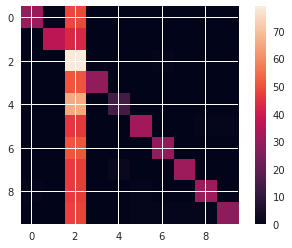

In [12]:
C = metrics.confusion_matrix(y_test, y_pred)
print (C)
print (metrics.classification_report(y_test, y_pred))
plt.imshow(C)
plt.colorbar()
plt.show()